In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>


In [134]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [135]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))
 

(11.707786838827133, 12.391304347826088, 13.074821856825043)
(11.02521592553596, 12.391304347826088, 13.757392770116216)


<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



In [84]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  error_bad_lines=False) # Откроем датасет


df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6
...,...,...,...
4069,WV,Webster,34.2
4070,WV,Wetzel,37.8
4071,WV,Wirt,31.1
4072,WV,Wood,32.9


Среднее по всей выборке:  44.07946954813346


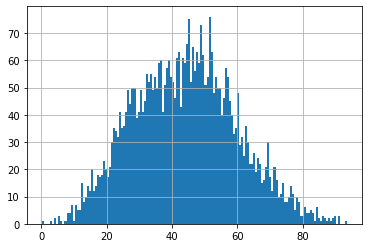

In [85]:
df['%'].hist(bins=150)
print('Среднее по всей выборке: ',df['%'].mean())

In [89]:
some_states_1 = ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']



sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам
l,s,r=mean_confidence_interval(sub_df['%'], 0.99)
l,s,r

(42.025084908626724, 46.23478260869564, 50.444480308764554)

In [7]:
#df['State Postal'].value_counts()  Расскоментить, если интересно соотношение штатов. 

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Расмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в предверии выборов президента в США и хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Таким образом, обозначим погрешность: $\Delta$ = 5, Стандартное отклонение: $\sigma$ = 15 и Z = 1,96

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [80]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [81]:
N = int(((sigma*Z)/Delta)**2)
N

34

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


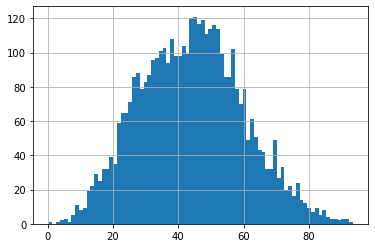

In [90]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [11]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())
print(MEAN-Delta, MEAN+Delta)

Среднее выборки:  44.13823529411764
Среднее генеральной совокупности:  44.07946954813346
39.13823529411764 49.13823529411764


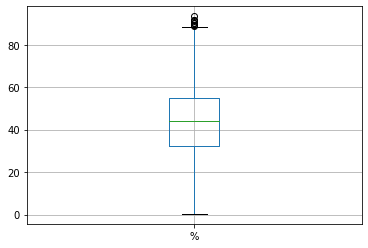

In [17]:
df.boxplot(by='%')

In [12]:
# from scipy.stats import norm
# norm.ppf(0.95, loc=0, scale=1)


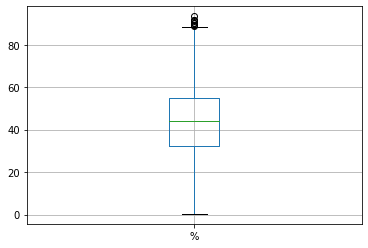

In [91]:
 df.reset_index().boxplot(column='%')

# Проверка гипотез с помощью Python. 

In [78]:
from scipy import stats  # Импортируем библиотеку
np.random.seed(21)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное распределение = scale
A = stats.norm.rvs(loc=50, scale=10, size=500)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 


t, p = stats.ttest_ind(A, B)
t, p

(3.0258839844589733, 0.0025107075866209454)

In [3]:
# stats.ttest_ind(A, B, equal_var = False)

Мы получаем хорошее значение p, равное 0,0026, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
это доказывает, что средние значения двух распределений различны и различие статистически значимо.

#### И действительно, если посмотреть на сгенерированные выборки. 

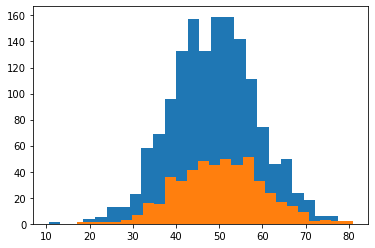

In [17]:
plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

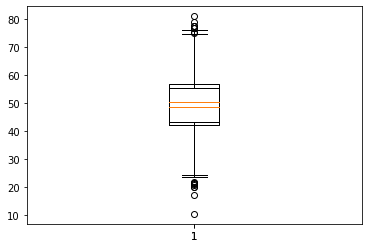

In [18]:
# plt.boxplot(A);
# plt.boxplot(B);


# Проверка гипотез

### t-Тест Стьюдента

In [77]:
from scipy import stats
np.random.seed(42)  # Загрепим seed для воспроизводимости результата.

## Определим 2 случайных распределения
N = 100  #Размер выборок


b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 2 and var = 1
 
### мы получаем хорошее значение p, равное 0,0005, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
### это доказывает, что средние значения двух распределений различны и различие статистически значимо.
 
t , p  = stats.ttest_ind(a, b)
print("t = " + str(t))
print("p = " + str(p))

# Большое значение t-score говорит нам, что группы отличаются
# Маленькие значения t-score говорят нам, что группы схожи

t = 12.348223942992178
p = 2.395356067387906e-26


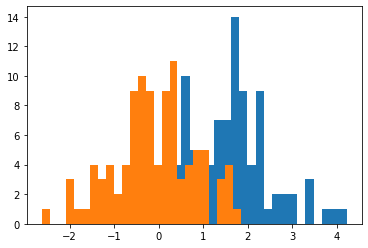

In [20]:
plt.hist(a, bins=25); #Выборка a
plt.hist(b, bins=25);  #Выборка b

# a. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

In [92]:
import scipy.stats as stats
 

population_ages1=stats.norm.rvs(loc=18, scale=45, size=150000)   
population_ages2=stats.norm.rvs(loc=18, scale=10, size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 


india_ages1=stats.norm.rvs(loc=18, scale=45, size=9000)  # Индия 1
india_ages2=stats.norm.rvs(loc=18, scale=35, size=9000)
india_ages=np.concatenate((india_ages1,india_ages2)) #Выборка
population_ages.mean()


17.939253506913495

In [93]:
india_ages.mean()

18.031857004413435

In [94]:
stats.ttest_1samp(a=india_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=0.3050810052422901, pvalue=0.7603079852677389)

**Теперь это значение `statistic=0.1197` говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.**

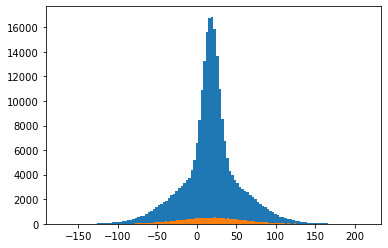

In [95]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

# b. Двух-выборочный T-test (Две выборки)

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

In [96]:
np.random.seed(84)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000) # loc = среднее, scale = стандартное распределение
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
 

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()
 

16.93951973942959

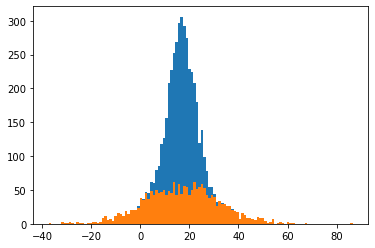

In [97]:
#Расскомментировать, если интересно увидеть отличия визуально
plt.hist(maharashtra_ages, bins=120);
plt.hist(maharashtra_ages2, bins=120);

In [98]:
stats.ttest_ind(a=india_ages, b=maharashtra_ages, equal_var=False)  # Смотри сюда!!! 

Ttest_indResult(statistic=3.2462198255034154, pvalue=0.0011711678554402233)

**Значение `pvalue= 0.0014` говорит о том, что существует вероятность 0.14%, что данные выборки настолько далеко друг от друга
для двух одинаковых групп. Это меньше, чем уровень достоверности 5%.**

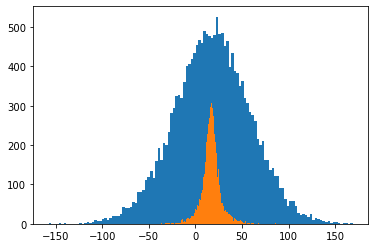

In [100]:
#Расскомментировать, если интересно увидеть отличия визуально
plt.hist(india_ages, bins=120);
plt.hist(maharashtra_ages, bins=120);

# c. Paired T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

In [101]:
np.random.seed(12)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,245.670775,244.316557,-1.354218
std,31.536594,31.351874,5.157803
min,155.577504,155.560250,-13.370467
25%,227.831705,224.927586,-5.204568
50%,246.688266,246.142588,-1.629565
75%,265.132293,261.730528,1.989948
max,336.154582,332.751176,14.935431


In [76]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=2.625571255881005, pvalue=0.01002290520917281)

**Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами.**

# Практическое применение t-Тест Стьюдента

<div class="alert alert-info">
<b>Задание: </b>
    
Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рыннок манго в течени последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 

Сможели ли вы их разоблачить с помощью t-Тест Стьюдента?
</div>

<p style="align: center;"><img align=center src="https://www.canadianbusiness.com/wp-content/uploads/2012/02/6ed2b4b84defad6ff7b3b813f634.jpg"  width=400></p>



In [102]:
avocado = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/avocado.csv'
Students = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/StudentsPerformance.csv'

A = pd.read_csv(avocado, sep=',', index_col=0, error_bad_lines=False).AveragePrice[:1000]
B = pd.read_csv(Students, sep=',', index_col=0, error_bad_lines=False)['math score']
t, p = stats.ttest_ind(A, B)
t, p

(-135.56983375430264, 0.0)

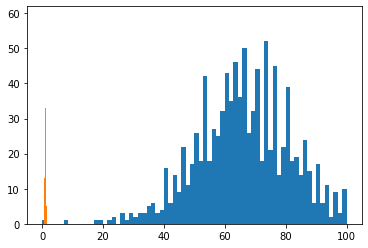

In [103]:
#и действительно выборки пренадлежать разным распределениям

plt.hist(B, bins=70);
plt.hist(A, bins=70);

# $\chi^{2}$ -  Критерий пирсона

In [104]:
from scipy.stats import chi2_contingency

# Сгенерируем случайную матрицу 2х2
X, y = np.random.randint(2, size=50).reshape(10, 5), np.random.randint(2, size=10) 
contingency_table = sps.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A

print('Реальная таблица')
print(contingency_table)
chi2, p, do, expected =  chi2_contingency(contingency_table)

print(chi2, p, do)

print('Ожидаемая таблица')
print(expected)

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

NameError: name 'sps' is not defined

**Пример использования Хи-квадрат теста**

In [105]:
from scipy.stats import chi2_contingency

 
table = [[10, 20, 30],
         [6,  9,  17]]

print(np.array(table))
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно независимы')
else:
    print('Вероятно зависимы')

[[10 20 30]
 [ 6  9 17]]
stat=0.272, p=0.873
Вероятно независимы


In [106]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Биология','Химия','Физика'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Биология,25,46,15
Химия,15,44,15
Физика,10,10,20


**Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.**

In [21]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, критическоре значение=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
        Они независимы.""" % (significance))

p-value is:  0.0004176680832291999
chi=20.392835, критическоре значение=9.487729

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.


**В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [22]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.000418, significance=0.05

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.


# Точный критерий Фишера 

In [110]:
import scipy as sp

x = [[107,93],[74,45]]
print(x)
oddsratio, pvalue = sp.stats.fisher_exact(x)
oddsratio, pvalue

[[107, 93], [74, 45]]


(0.6996512641673932, 0.1607594221528123)

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостирежение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [159]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


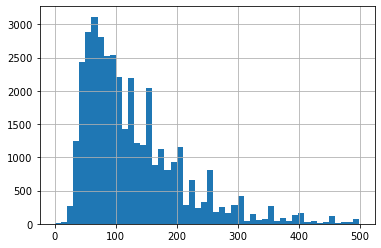

In [163]:
df[df.price<500].price.hist(bins=50)

In [166]:
print('Можно ли использовать тут наш подход?')

Можно ли использовать тут наш подход?


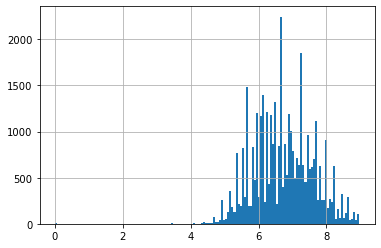

In [167]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=150)


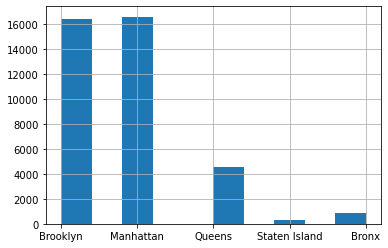

In [165]:
df.neighbourhood_group.hist()

In [51]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

122.56345677697612


(111.68856960410567, 115.49388042203987, 119.29919123997406)

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

<p style="align: left;"><b>Для начала, большое спасибо, что напомнили о возможности использования в markdown html тегов.</b>
<br>C картиночками оно повеселее как-то... </p>

Для поиска нам потребуется формула:

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

Для применения данной формулы нам необходимо определить квантиль нормального распределения.

При $\beta$ = 0.95 Квантиль Z = 1 - a/2,
Где:
а = 1-$\beta$
Тогда уровень для Z = 1-(0.5/2) = 0.975, а само значение Z = 2.241

Поскольку нам дано значение дисперсии $\sigma^2$ = 225, а в формуле используется стандартное отклонение $\sigma$, то берем корень из дисперсии 225**0,5 = 15 

In [2]:
### Ваши код/вычисления...

n = int(((15*2.241)/3)**2)  #Запишите в эту переменную ваш высчитанный ответ!
# n = round(n) #Если встроке выше убрать int() и раскоментить round(n), то n = 126, что ТАКЖЕ НЕВЕРНО
n


125

In [3]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
    
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<p style="align: center;"><img align=center src="https://avsweb.ru/userfls/news/large/wtf.gif"></p>

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

Доверительный интервал имеет вид (¯x − ∆; ¯x + ∆).

Уровень доверия равен β = 0.98, поэтому α = 0.02.

По таблице нормального распределения находим: **1 − α /2 = 0.99** и определяем квантиль **z_α = 2.33.**

Теперь можем найти точность ∆ = (σ /√n)* z_α:

In [4]:
delta_z =(15/(25**0.5)*2.33)
delta_z

6.99

Искомый 98%-доверительный интервал имеет вид: 

In [5]:
interval_98 = (130 - 6.99, 130 + 6.99)
interval_98

(123.01, 136.99)

In [6]:
### тогда разница между правым и левым концом
difference_98 = round(interval_98[1] - interval_98[0])
difference_98

14

In [7]:
### Ваши код/вычисления...

L = difference_98  #Запишите в эту переменную ваш высчитанный ответ!


In [8]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<p style="align: left;"><img align=left src="https://media1.tenor.com/images/61ae345e267e9ce138708d8058996bf4/tenor.gif"></p>

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [70]:
import scipy.stats as stats
# loc = среднее, scale = стандартное распределение
population_men  = stats.norm.rvs(loc=171, scale=19, size=12000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

# population=np.concatenate((population_men, population_women))
# population.mean() ### Ваш код...
# population_women.mean()

168.08806087948656

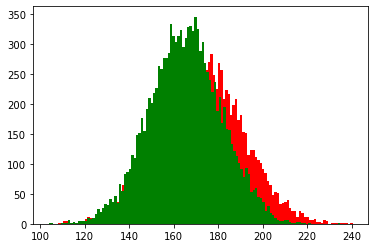

In [71]:
plt.hist(population_men, bins=120, color='red');
plt.hist(population_women, bins=120, color='green');
plt.show()

In [72]:
stats.ttest_ind(a=population_men, b=population_women, equal_var=False)  # Смотри сюда!!! 

Ttest_indResult(statistic=26.33200439882133, pvalue=1.2923173308844746e-150)

**Вывод 1:**

При одинаковом размере популяций **р-value = 1,29 > 0.001**, а следовательно выборки практически не отличаются, эффект случайный.

Отсюда следует, что нулевая гипотеза "различие между выборками незначительно" подтверждается, а альтернативная отвергается.

**Вывод 2:**

При увеличении размера одной из выборок (любой) значение p-value &#8594;  0


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

Для применения данной формулы нам необходимо определить квантиль нормального распределения.

При $\beta$ = 0.95 Квантиль Z = 1 - a/2,

Где: а = 1-$\beta$.

Тогда уровень для Z = 1-(0.5/2) = 0.975, а само значение Z = 2.241


In [73]:
### Ваш код...
n = int(((150*2.241)/50)**2) 
n

45

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

В таком случае:
   - **нулевая гипотеза (H0)**: предсказания случайны и маг предсказывать не умеет
   - **альтернативная гипотеза (H_alt)**: предсказания не случайны и маг реально маг

In [108]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [133]:
import scipy.stats as stats
# Учтите, что у тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутствие эффекта


oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
oddsratio, pvalue
significance_value = 0.05
H0 = 'предсказания не случайны и маг предсказывать не умеет'
H_alt = 'Предсказания не случайны и маг реально маг'
print(oddsratio, pvalue)
if pvalue > significance_value:
    print('Поскольку pvalue равно', round(pvalue, 4), 'и это больше чем уровень значимости', str(significance_value) +',',  H0)
else:
    print(H_alt)
if oddsratio < 1:
    print('Значение отношения шансов равно ', round(oddsratio, 4), 'что меньше 1, а следовательно, в', round(1/oddsratio, 2), 'раза более вероятно, что предсказание мага окажется неверным')


0.5811965811965812 0.35417955365927367
Поскольку pvalue равно 0.3542 и это больше чем уровень значимости 0.05, предсказания не случайны и маг предсказывать не умеет
Значение отношения шансов равно  0.5812 что меньше 1, а следовательно, в 1.72 раза более вероятно, что предсказание мага окажется неверным


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [136]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, 0.9)### Ваш код...


(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [150]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1, data_1)#Ваш код:
t, p

(0.0, 1.0)

In [153]:
print(mean_confidence_interval(data_1, 0.9))
print(mean_confidence_interval(data_2, 0.9))

(6.074074746111319, 6.628571428571429, 7.183068111031539)
(3.6613946425192934, 3.967741935483871, 4.274089228448449)


In [155]:
stats.ttest_ind(a=data_1, b=data_2, equal_var=False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

Значение statistic = 7.0684 говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы (что обе выборки принадлежат одному множеству).
Т.о. если выборочное среднее в 7 раз отклоняется от нулевой гипотезы, с высокой долей вероятности мы можем говорить о том, что **нулевая гипотеза не верна и выборки разные.**

... что, на самом деле, меня смущает

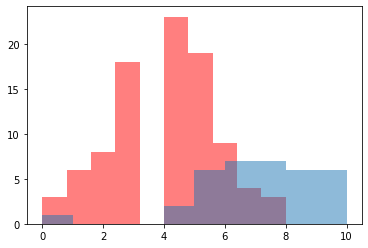

In [188]:
plt.hist(data_2, bins=10, color='red', alpha=0.5);
plt.hist(data_1, bins=10, alpha=0.5);

Мне не понравилась картинка гистограмм, поскольку похоже, что в исходном состоянии массивы не имеют нормального распределения.

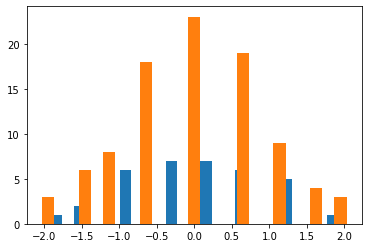

In [191]:
# честно нагугленный вариант нормализации данных, потому что используемый выше код нормализации не работает 
# (вернее, моего python кун-фу не хватает, чтобы его осознать и применить правильно) 
from scipy.stats import rankdata, norm

new_data_1 = norm.ppf(rankdata(data_1)/(len(data_1) + 1))
new_data_2 = norm.ppf(rankdata(data_2)/(len(data_2) + 1))
# plt.hist(data_1, bins=25, alpha=0.5);
plt.hist(new_data_1, bins=25); # уже н
plt.hist(new_data_2, bins=25);

Картинка то поменялася!

In [193]:
stats.ttest_ind(a=new_data_1, b=new_data_2, equal_var=False)

Ttest_indResult(statistic=-0.007926427315140365, pvalue=0.993700519189553)

Ну, теперь точно можно сказать, что массивы, на самом деле, **принадлежат одному множеству** (statistic = 0.008 -->  выборочное среднее отклоняется от нулевой гипотезы на 0,8%)

<p style="align: center;"><img align=left src="https://cs.pikabu.ru/images/big_size_comm/2012-10_6/1351616553161.gif"></p>

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

***Ваши выводы:***

ну, если нулевой гипотезой является именно утверждение что распределение нормальное, то получается, что существует вероятность в 3% что мы ошибемся приняв альтернативную гипотезу. Для принятия итогового решения о том, верна ли нулевая гипотеза или нет, нужно определиться с фиксированным уровнем значимости 'а', и дальше уже сопоставлять p-value и 'а'.

Поскольку в условии фиксированный уровень значимости не задан, то, если испльзовать наиболее часто применяемый а = 0.05, то получим, что:

**p-value < a &#8594; нулевая гипотеза не верна &#8594; исходное распределение не нормальное**

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [214]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
stats.ttest_ind(a=A, b=B, equal_var=False)# Подсказка, обратите внимание на Two-sample T-test

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

При таком значении p-value нулевая гипотеза **номинально** подтверждается (значимое различие эффективности препаратов `А` и `B` действительно присутстует), но в действительности, это практически пороговое значение, превышающее уровень значимости всего 0,1% 

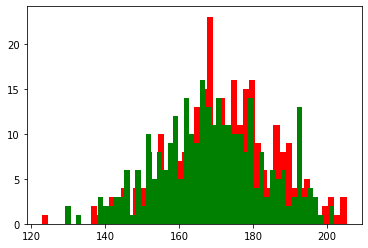

In [215]:
plt.hist(B, bins=50, color='red');
plt.hist(A, bins=50, color='green');

Гистограммы двух выборок демонстрируют, на мой взгляд, не только общую схожесть, но и то,что различия присутствуют в большей степени из-за выбросов.

Исключительно из интереса попробуем нормализовать распределения в выборках:

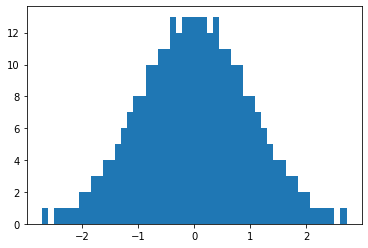

In [210]:
new_A = norm.ppf(rankdata(A)/(len(A) + 1))
new_B = norm.ppf(rankdata(B)/(len(B) + 1))
# plt.hist(A, bins=50);
plt.hist(new_A, bins=50, color='green');
plt.hist(new_B, bins=50);

Собственно, как и предполагалось, после нормализации распределений в выборках гистограммы стали абсолютно идентичными, а значит, я бы сказал, что препараты идентичны по своему уровню эффективности (нулевая гипотеза не верна)